# hypo-2 노령화 지수가 높은 곳일수록 전통시장, 공원 등 주요 문화시설이 많을 것이다.

## require library install

In [2]:
# !pip install folium
# !pip install googlemaps
# !pip install openpyxl
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

### library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import googlemaps
import seaborn as sns
from matplotlib import rc 
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False  

## data import

In [2]:
# 노령화 지수
old_point = pd.read_excel('./data/자치구별+노령화지수(추계인구)_20240929181758.xlsx')
old_point.head()

,자치구별(1),자치구별(2),2023,2023.1,2023.2
0,자치구별(1),자치구별(2),합계,남자,여자
1,합계,소계,199.1,171.6,228.2
2,NaN,종로구,267.8,237.3,298
3,NaN,중구,286.5,245.3,329.3
4,NaN,용산구,200.7,172.2,230


In [173]:
old_pop = pd.read_excel('./data/자치구별+연령계층별+인구구성비(추계인구)_20241108190613.xlsx')
old_pop.head()

,자치구별(1),2023,2023.1,2023.2
0,자치구별(1),유소년인구,생산가능인구,고령인구
1,합계,9.1,72.8,18.1
2,종로구,7,74.1,18.9
3,중구,6.8,73.6,19.6
4,용산구,8.6,74.1,17.3


In [3]:
# 공원, 전통시장 등
park = pd.read_csv('./data/KC_ODSN_WALK_RECOMEND_LIST_2023.csv')
park.head()

,ESNTL_ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_CD,CTPRVN_NM,SIGNGU_CD,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,...,BULD_MANAGE_CD,TEL_NO,ZIP_NO,HMPG_URL,FCLTY_LA,FCLTY_LO,ORIGIN_NM,ADIT_DC,UPDT_DT,REGIST_DT
0,KCOWRPO23N000000001,쇼핑시설,쇼핑시설_전통시장,원미부흥시장,41,경기도,41190,부천시 원미구,4119010100,원미동,...,4119510100101180000000000,0.0,14571.0,0.0,37.553516,126.921715,공공데이터,상설장,20231231,20231231
1,KCOWRPO23N000000002,쇼핑시설,쇼핑시설_전통시장,원미종합시장,41,경기도,41190,부천시 원미구,4119010100,원미동,...,4119510100100970000000000,0.0,14568.0,0.0,37.545392,126.953319,공공데이터,상설장,20231231,20231231
2,KCOWRPO23N000000003,자연,자연_공원,원미별빛,41,경기도,41190,부천시 원미구,4119010100,원미동,...,4119510100101270000000000,0.0,14571.0,0.0,37.491966,126.787309,공공데이터,-,20231231,20231231
3,KCOWRPO23N000000004,자연,자연_공원,원미,41,경기도,41190,부천시 원미구,4119010100,원미동,...,4119510100100150000000000,0.0,14659.0,0.0,37.497985,126.799040,공공데이터,-,20231231,20231231
4,KCOWRPO23N000000005,쇼핑시설,쇼핑시설_전통시장,음성시장,43,충청북도,43770,음성군,4377025021,읍내리,...,4377025021102490000000000,0.0,27697.0,0.0,36.938166,127.692127,공공데이터,5일장,20231231,20231231


In [164]:
# 문화시설 (복지관 등)

culture = pd.read_csv('./data/KC_485_DMSTC_MCST_OLDLSR_2023.csv')
culture.head()

,ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,ADSTRD_CD,ADSTRD_NM,...,FCLTY_LO,FCLTY_LA,OPER_INSTT_NM,TEL_NO,LC_LO,LC_LA,LAST_CHG_DE,ORIGIN_NM,FILE_NM,BASE_DE
0,KC485PC23N000000000001,문화시설,복지관,1004가족복지센터,전라북도,익산시,5214011400,모현동1가,5214061000,모현동,...,126.946306,35.949725,NaN,NaN,9.500649e+05,1.772699e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
1,KC485PC23N000000000002,문화시설,복지관,1004가족재가복지센터,경기도,화성시,4159025325,봉담읍 와우리,4159025300,봉담읍,...,126.972771,37.215112,NaN,NaN,9.532215e+05,1.913051e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
2,KC485PC23N000000000003,문화시설,복지관,1004엔젤스방문요양센터,경기도,고양시 일산서구,4128710500,덕이동,4128760000,덕이동,...,126.751049,37.699774,NaN,NaN,9.339764e+05,1.966954e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
3,KC485PC23N000000000004,문화시설,복지관,100세고성재가복지센터,경상남도,고성군,4882025021,고성읍 성내리,4882025000,고성읍,...,128.321049,34.974063,NaN,NaN,1.074947e+06,1.664660e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
4,KC485PC23N000000000005,문화시설,복지관,100세노인복지센터,경상남도,진주시,4817012500,신안동,4817071500,신안동,...,128.071955,35.185477,NaN,NaN,1.052074e+06,1.687947e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231


In [5]:
tour = pd.read_csv('./data/RB_SR_TURIST_TURSM_INFO_20221231.csv')
tour.head()

/var/folders/76/295r32t542b3jtvsn34n34s00000gn/T/ipykernel_4966/3793178725.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tour = pd.read_csv('./data/RB_SR_TURIST_TURSM_INFO_20221231.csv')


,FLAG_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_KLANG_NM,SIGNGU_KLANG_NM,CTPRVN_ENG_NM,SIGNGU_ENG_NM,CTPRVN_CHNLNG_NM,SIGNGU_CHNLNG_NM,CTPRVN_JLANG_NM,SIGNGU_JLANG_NM,CTPRVN_CD,SIGNGU_CD,FCLTY_LO,FCLTY_LA,HMPG_URL,TEL_NO,REGIST_DE
0,노인복지시설,새실경로당,김천시 새실길 18-3 (다수동),경상북도,김천시,Gyeongsangbuk-do,Gimcheonsi,慶尙北道,金泉市,慶?北道（キョンサンブクト),金泉市(キムチョンシ),37,37030,129.471868,42.909408,NaN,NaN,20221231
1,노인복지시설,각리3리경로당,영덕군 병곡면 신평1길 24,경상북도,영덕군,Gyeongsangbuk-do,Yeongdeokgun,慶尙北道,盈德郡,慶?北道（キョンサンブクト),盈?郡（ヨンドクグン）,37,37350,129.471868,42.909408,NaN,NaN,20221231
2,관광호텔,데이즈 호텔 명동,NaN,서울특별시,중구,Seoul,Junggu,首爾特別市,中區,ソウル特別市,中?（チュング）,11,11020,123.431472,41.805699,NaN,NaN,20221231
3,노인복지시설,신도2리경로당,청도군 청도읍 신도1길 49,경상북도,청도군,Gyeongsangbuk-do,Cheongdogun,慶尙北道,淸道郡,慶?北道（キョンサンブクト),?道郡（チョンドグン）,37,37360,123.431472,41.805699,NaN,NaN,20221231
4,노인복지시설,국제경로당,"부산광역시 연제구 연수로 184(연산3동, 국제아파트)",부산광역시,연제구,Busan,Yeonjegu,釜山廣域市,蓮堤區,釜山（プサン）?域市,蓮堤?（ヨンジェグ）,21,21130,128.573767,38.194816,NaN,NaN,20221231


In [129]:
area = pd.read_excel('./data/행정구역(구별)_20241014164019.xlsx')
area.head()

/opt/anaconda3/envs/dev/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,자치구별(1),자치구별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5
0,자치구별(1),자치구별(2),면적,면적,동 (개),동 (개),통 (개),반 (개)
1,자치구별(1),자치구별(2),면적 (km²),구성비 (%),행정,법정,소계,소계
2,서울시,소계,605.21,100,426,467,12881,96502
3,NaN,종로구,23.91,3.95,17,87,279,1475
4,NaN,중구,9.96,1.65,15,74,253,1582


## preprocessing

### old_point

In [6]:
old_point.drop(index=[0, 1], columns=["자치구별(1)"], inplace=True)
old_point.columns = ['구별', '합계', '남자', '여자']
old_point.reset_index(drop=True, inplace=True)
old_point.head()

,구별,합계,남자,여자
0,종로구,267.8,237.3,298
1,중구,286.5,245.3,329.3
2,용산구,200.7,172.2,230
3,성동구,193.4,167.5,219.9
4,광진구,211.1,183.7,240.1


### old_pop

In [176]:
old_pop.drop(index=[0, 1], inplace=True)
old_pop.columns = ['구별', '유소년인구', '생산가능인구', '고령인구']
old_pop.reset_index(drop=True, inplace=True)
old_pop.head()

,구별,유소년인구,생산가능인구,고령인구
0,종로구,7,74.1,18.9
1,중구,6.8,73.6,19.6
2,용산구,8.6,74.1,17.3
3,성동구,8.9,73.8,17.3
4,광진구,7.7,76.1,16.2


### park_seoul

In [7]:
park = park[park['CTPRVN_NM'].str.contains('서울')]
park.head()

,ESNTL_ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_CD,CTPRVN_NM,SIGNGU_CD,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,...,BULD_MANAGE_CD,TEL_NO,ZIP_NO,HMPG_URL,FCLTY_LA,FCLTY_LO,ORIGIN_NM,ADIT_DC,UPDT_DT,REGIST_DT
34,KCOWRPO23N000000035,자연,자연_공원,효 성,11,서울특별시,11350,노원구,1135010300,공릉동,...,1135010300107420000000000,0.0,1804.0,0.0,37.621233,127.087753,공공데이터,-,20231231,20231231
35,KCOWRPO23N000000036,자연,자연_공원,등나무,11,서울특별시,11350,노원구,1135010600,중계동,...,1135010600105080000000000,0.0,1783.0,0.0,37.640661,127.066866,공공데이터,-,20231231,20231231
36,KCOWRPO23N000000037,자연,자연_공원,마들,0,서울,0,노원구,0,상계동,...,NaN,0.0,14567.0,0.0,37.644873,127.058305,공공데이터,-,20231231,20231231
37,KCOWRPO23N000000038,자연,자연_공원,매 봉,11,서울특별시,11350,노원구,1135010200,월계동,...,1135010200103200000000000,0.0,1865.0,0.0,37.633234,127.059006,공공데이터,-,20231231,20231231
38,KCOWRPO23N000000039,자연,자연_공원,벼 루,11,서울특별시,11350,노원구,1135010200,월계동,...,1135010200104970000000000,0.0,1890.0,0.0,37.619240,127.056545,공공데이터,-,20231231,20231231


In [8]:
park.drop(columns=['ESNTL_ID', 'CTPRVN_CD', 'SIGNGU_CD', 'LEGALDONG_CD', 'ROAD_NM_CD' , 'TEL_NO', 'ZIP_NO',
                   'LEGALDONG_NM', 'ADDR_ENG_NM', 'ADSTRD_CD', 'BULD_NM', 'BULD_MANAGE_CD', 'HMPG_URL', 'ORIGIN_NM', 'ADIT_DC',
                   'UPDT_DT', 'REGIST_DT'], inplace=True)
park.reset_index(drop=True, inplace=True)
park.head()

,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,FCLTY_ROAD_NM_ADDR,LNM_ADDR,FCLTY_LA,FCLTY_LO
0,자연,자연_공원,효 성,서울특별시,노원구,"서울특별시 노원구 화랑로 556 (공릉동, 효성아파트)",서울특별시 노원구 공릉동 742 효성아파트,37.621233,127.087753
1,자연,자연_공원,등나무,서울특별시,노원구,서울특별시 노원구 동일로 1238 (중계동),서울특별시 노원구 중계동 508 서울시립 북서울미술관,37.640661,127.066866
2,자연,자연_공원,마들,서울,노원구,서울특별시 노원구 덕릉로 450,서울 노원구 상계동 770-2,37.644873,127.058305
3,자연,자연_공원,매 봉,서울특별시,노원구,서울특별시 노원구 월계로55길 49 (월계동),서울특별시 노원구 월계동 320-6,37.633234,127.059006
4,자연,자연_공원,벼 루,서울특별시,노원구,서울특별시 노원구 광운로1길 24 (월계동),서울특별시 노원구 월계동 500 광운중/광운인공지능고등학교,37.619240,127.056545


In [9]:
park['MLSFC_NM'].value_counts()

MLSFC_NM
자연_공원        1621
쇼핑시설_전통시장     219
무장애_나눔길         3
Name: count, dtype: int64

In [10]:
park['LCLAS_NM'].value_counts()

LCLAS_NM
자연       1621
쇼핑시설      219
무장애장소       3
Name: count, dtype: int64

### culture

In [11]:
culture = culture[culture['CTPRVN_NM'].str.contains('서울')]
culture.head()

,ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,ADSTRD_CD,ADSTRD_NM,...,FCLTY_LO,FCLTY_LA,OPER_INSTT_NM,TEL_NO,LC_LO,LC_LA,LAST_CHG_DE,ORIGIN_NM,FILE_NM,BASE_DE
17,KC485PC23N000000000018,문화시설,복지관,1318상상발전소,서울특별시,중랑구,1126010400,묵동,1126063000,묵2동,...,127.077072,37.606135,NaN,NaN,962670.272236,1.956385e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
18,KC485PC23N000000000019,문화시설,복지관,1318해피존,서울특별시,용산구,1117012800,한강로3가,1117062500,한강로동,...,126.956555,37.531929,NaN,NaN,951985.086624,1.948207e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
29,KC485PC23N000000000030,문화시설,복지관,153재가장기요양기관,서울특별시,중랑구,1126010100,면목동,1126057000,면목7동,...,127.083549,37.578477,NaN,NaN,963228.320845,1.953314e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
71,KC485PC23N000000000072,문화시설,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,1150010400,가양동,1150060400,가양2동,...,126.856279,37.564612,NaN,NaN,943150.174500,1.951889e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
102,KC485PC23N000000000103,문화시설,복지관,99팔팔재가노인복지센터,서울특별시,강서구,1150010300,화곡동,1150059100,화곡6동,...,126.854230,37.554832,NaN,NaN,942961.762211,1.950805e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231


In [12]:
culture.drop(columns=['ID', 'LEGALDONG_CD', 'OPER_INSTT_NM', 'TEL_NO', "ORIGIN_NM", "LAST_CHG_DE", "FILE_NM",
                        'BASE_DE', 'LCLAS_NM', 'ADSTRD_CD', 'LEGALDONG_NM', 'RDNMADR_CD', 'ADSTRD_NM', 'GID_CD', 
                        "ZIP_NO", "LC_LO", "LC_LA"], inplace=True)
culture.reset_index(drop=True, inplace=True)
culture.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울특별시 중랑구 묵동 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,서울특별시,용산구,서울특별시 용산구 한강로3가 청파로 46,126.956555,37.531929
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울특별시 중랑구 면목동 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울특별시 강서구 가양동 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울특별시 강서구 화곡동 공항대로 426,126.854230,37.554832


In [13]:
culture['MLSFC_NM'].value_counts()

MLSFC_NM
노인정/노인회관    1492
복지관         1195
보육원/양로원      318
마을/새마을회관      51
Name: count, dtype: int64

### tour

In [14]:
tour.head()

,FLAG_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_KLANG_NM,SIGNGU_KLANG_NM,CTPRVN_ENG_NM,SIGNGU_ENG_NM,CTPRVN_CHNLNG_NM,SIGNGU_CHNLNG_NM,CTPRVN_JLANG_NM,SIGNGU_JLANG_NM,CTPRVN_CD,SIGNGU_CD,FCLTY_LO,FCLTY_LA,HMPG_URL,TEL_NO,REGIST_DE
0,노인복지시설,새실경로당,김천시 새실길 18-3 (다수동),경상북도,김천시,Gyeongsangbuk-do,Gimcheonsi,慶尙北道,金泉市,慶?北道（キョンサンブクト),金泉市(キムチョンシ),37,37030,129.471868,42.909408,NaN,NaN,20221231
1,노인복지시설,각리3리경로당,영덕군 병곡면 신평1길 24,경상북도,영덕군,Gyeongsangbuk-do,Yeongdeokgun,慶尙北道,盈德郡,慶?北道（キョンサンブクト),盈?郡（ヨンドクグン）,37,37350,129.471868,42.909408,NaN,NaN,20221231
2,관광호텔,데이즈 호텔 명동,NaN,서울특별시,중구,Seoul,Junggu,首爾特別市,中區,ソウル特別市,中?（チュング）,11,11020,123.431472,41.805699,NaN,NaN,20221231
3,노인복지시설,신도2리경로당,청도군 청도읍 신도1길 49,경상북도,청도군,Gyeongsangbuk-do,Cheongdogun,慶尙北道,淸道郡,慶?北道（キョンサンブクト),?道郡（チョンドグン）,37,37360,123.431472,41.805699,NaN,NaN,20221231
4,노인복지시설,국제경로당,"부산광역시 연제구 연수로 184(연산3동, 국제아파트)",부산광역시,연제구,Busan,Yeonjegu,釜山廣域市,蓮堤區,釜山（プサン）?域市,蓮堤?（ヨンジェグ）,21,21130,128.573767,38.194816,NaN,NaN,20221231


In [15]:
tour.drop(columns=['CTPRVN_ENG_NM', 'SIGNGU_ENG_NM', 'CTPRVN_CHNLNG_NM', 'SIGNGU_CHNLNG_NM',
                   'CTPRVN_JLANG_NM', 'SIGNGU_JLANG_NM', 'CTPRVN_CD', 'SIGNGU_CD', 'HMPG_URL', 'TEL_NO', 'REGIST_DE'], inplace=True)
tour.head()

,FLAG_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_KLANG_NM,SIGNGU_KLANG_NM,FCLTY_LO,FCLTY_LA
0,노인복지시설,새실경로당,김천시 새실길 18-3 (다수동),경상북도,김천시,129.471868,42.909408
1,노인복지시설,각리3리경로당,영덕군 병곡면 신평1길 24,경상북도,영덕군,129.471868,42.909408
2,관광호텔,데이즈 호텔 명동,NaN,서울특별시,중구,123.431472,41.805699
3,노인복지시설,신도2리경로당,청도군 청도읍 신도1길 49,경상북도,청도군,123.431472,41.805699
4,노인복지시설,국제경로당,"부산광역시 연제구 연수로 184(연산3동, 국제아파트)",부산광역시,연제구,128.573767,38.194816


In [16]:
tour = tour[tour['CTPRVN_KLANG_NM'].str.contains('서울')]
tour.reset_index(drop=True, inplace=True)
tour.head()

,FLAG_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_KLANG_NM,SIGNGU_KLANG_NM,FCLTY_LO,FCLTY_LA
0,관광호텔,데이즈 호텔 명동,NaN,서울특별시,중구,123.431472,41.805699
1,노인복지시설,한신아파트경로당,서울특별시 도봉구 도봉동 30-1번지,서울특별시,도봉구,127.041248,37.690244
2,노인복지시설,하계경로당,서울특별시 노원구 하계동 65-41번지,서울특별시,노원구,127.049245,37.689957
3,노인복지시설,서원아파트경로당,서울특별시 도봉구 도봉동 18-2번지,서울특별시,도봉구,127.042773,37.688896
4,노인복지시설,서광아파트경로당,서울특별시 도봉구 도봉동 643번지,서울특별시,도봉구,127.048673,37.687664


In [17]:
tour['FLAG_NM'].value_counts()

FLAG_NM
노인복지시설    3749
관광호텔       333
호스텔         96
가족호텔        21
소형호텔        10
벚꽃축제         2
Name: count, dtype: int64

### area

In [130]:
area.head()

,자치구별(1),자치구별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5
0,자치구별(1),자치구별(2),면적,면적,동 (개),동 (개),통 (개),반 (개)
1,자치구별(1),자치구별(2),면적 (km²),구성비 (%),행정,법정,소계,소계
2,서울시,소계,605.21,100,426,467,12881,96502
3,NaN,종로구,23.91,3.95,17,87,279,1475
4,NaN,중구,9.96,1.65,15,74,253,1582


In [132]:
area.drop(columns='자치구별(1)', index=[0,2], inplace=True)
area.columns = area.loc[1, :]
area.drop(index=1, inplace=True)
area.reset_index(drop=True, inplace=True)
area.head()

1,자치구별(2),면적 (km²),구성비 (%),행정,법정,소계,소계
0,종로구,23.91,3.95,17,87,279,1475
1,중구,9.96,1.65,15,74,253,1582
2,용산구,21.87,3.61,16,36,357,2601
3,성동구,16.82,2.78,17,17,471,3645
4,광진구,17.06,2.82,15,7,370,3012


In [133]:
area.rename(columns={"자치구별(2)" : '구별'}, inplace=True)
area.head()

1,구별,면적 (km²),구성비 (%),행정,법정,소계,소계
0,종로구,23.91,3.95,17,87,279,1475
1,중구,9.96,1.65,15,74,253,1582
2,용산구,21.87,3.61,16,36,357,2601
3,성동구,16.82,2.78,17,17,471,3645
4,광진구,17.06,2.82,15,7,370,3012


In [134]:
area = area[['구별', '면적 (km²)', '구성비 (%)']]

### merge to culture & tour

In [18]:
print(f"culture_seoul_dataframe rows = {culture.shape[0]}")
print(f"tour_seoul_dataframe rows = {tour.shape[0]}")

culture_seoul_dataframe rows = 3056
tour_seoul_dataframe rows = 4211


In [19]:
culture.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울특별시 중랑구 묵동 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,서울특별시,용산구,서울특별시 용산구 한강로3가 청파로 46,126.956555,37.531929
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울특별시 중랑구 면목동 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울특별시 강서구 가양동 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울특별시 강서구 화곡동 공항대로 426,126.854230,37.554832


In [20]:
culture[culture['RDNMADR_NM'].str.contains('번지')]

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA


In [21]:
tour = tour[tour['FLAG_NM'] == '노인복지시설']
tour.reset_index(drop=True, inplace=True)
tour.head()

,FLAG_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_KLANG_NM,SIGNGU_KLANG_NM,FCLTY_LO,FCLTY_LA
0,노인복지시설,한신아파트경로당,서울특별시 도봉구 도봉동 30-1번지,서울특별시,도봉구,127.041248,37.690244
1,노인복지시설,하계경로당,서울특별시 노원구 하계동 65-41번지,서울특별시,노원구,127.049245,37.689957
2,노인복지시설,서원아파트경로당,서울특별시 도봉구 도봉동 18-2번지,서울특별시,도봉구,127.042773,37.688896
3,노인복지시설,서광아파트경로당,서울특별시 도봉구 도봉동 643번지,서울특별시,도봉구,127.048673,37.687664
4,노인복지시설,약수경로당,서울특별시 도봉구 도봉동 454-14번지,서울특별시,도봉구,127.041647,37.686535


In [22]:
tour.rename(columns={'FLAG_NM' : "MLSFC_NM", "CTPRVN_KLANG_NM" : "CTPRVN_NM", "SIGNGU_KLANG_NM":"SIGNGU_NM"}, inplace=True)
tour.head()

,MLSFC_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_NM,SIGNGU_NM,FCLTY_LO,FCLTY_LA
0,노인복지시설,한신아파트경로당,서울특별시 도봉구 도봉동 30-1번지,서울특별시,도봉구,127.041248,37.690244
1,노인복지시설,하계경로당,서울특별시 노원구 하계동 65-41번지,서울특별시,노원구,127.049245,37.689957
2,노인복지시설,서원아파트경로당,서울특별시 도봉구 도봉동 18-2번지,서울특별시,도봉구,127.042773,37.688896
3,노인복지시설,서광아파트경로당,서울특별시 도봉구 도봉동 643번지,서울특별시,도봉구,127.048673,37.687664
4,노인복지시설,약수경로당,서울특별시 도봉구 도봉동 454-14번지,서울특별시,도봉구,127.041647,37.686535


#### merge

In [23]:
culture.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울특별시 중랑구 묵동 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,서울특별시,용산구,서울특별시 용산구 한강로3가 청파로 46,126.956555,37.531929
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울특별시 중랑구 면목동 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울특별시 강서구 가양동 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울특별시 강서구 화곡동 공항대로 426,126.854230,37.554832


In [24]:
tour.head()

,MLSFC_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_NM,SIGNGU_NM,FCLTY_LO,FCLTY_LA
0,노인복지시설,한신아파트경로당,서울특별시 도봉구 도봉동 30-1번지,서울특별시,도봉구,127.041248,37.690244
1,노인복지시설,하계경로당,서울특별시 노원구 하계동 65-41번지,서울특별시,노원구,127.049245,37.689957
2,노인복지시설,서원아파트경로당,서울특별시 도봉구 도봉동 18-2번지,서울특별시,도봉구,127.042773,37.688896
3,노인복지시설,서광아파트경로당,서울특별시 도봉구 도봉동 643번지,서울특별시,도봉구,127.048673,37.687664
4,노인복지시설,약수경로당,서울특별시 도봉구 도봉동 454-14번지,서울특별시,도봉구,127.041647,37.686535


In [25]:
facility = pd.concat([culture, tour], ignore_index=True)
facility.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울특별시 중랑구 묵동 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,서울특별시,용산구,서울특별시 용산구 한강로3가 청파로 46,126.956555,37.531929
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울특별시 중랑구 면목동 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울특별시 강서구 가양동 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울특별시 강서구 화곡동 공항대로 426,126.854230,37.554832


In [26]:
facility.drop_duplicates(inplace=True)
facility.reset_index(drop=True, inplace=True)
facility.shape

(6796, 7)

In [27]:
facility.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울특별시 중랑구 묵동 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,서울특별시,용산구,서울특별시 용산구 한강로3가 청파로 46,126.956555,37.531929
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울특별시 중랑구 면목동 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울특별시 강서구 가양동 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울특별시 강서구 화곡동 공항대로 426,126.854230,37.554832


In [28]:
# null 값 63행 확인
facility[facility['FCLTY_LO'].isna() | facility['FCLTY_LA'].isna()]

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
6733,노인복지시설,대청3단지경로당,서울특별시,강남구,서울특별시 강남구 개포동,NaN,NaN
6734,노인복지시설,포이경로당,서울특별시,강남구,서울특별시 강남구 개포동,NaN,NaN
6735,노인복지시설,개포3단지(아)경로당,서울특별시,강남구,서울특별시 강남구 개포동 138번지,NaN,NaN
6736,노인복지시설,개포경로당,서울특별시,강남구,서울특별시 강남구 개포동 169-3번지,NaN,NaN
6737,노인복지시설,이화경로당,서울특별시,강남구,서울특별시 강남구 개포동 181번지,NaN,NaN
...,...,...,...,...,...,...,...
6791,노인복지시설,삼부아파트경로당,서울특별시,성동구,서울특별시 성동구 행당동 147번지,NaN,NaN
6792,노인복지시설,행당한신 제2 경로당,서울특별시,성동구,"서울특별시 성동구 행당동 201 201동 105,106호",NaN,NaN
6793,노인복지시설,"명륜2,4가경로당",서울특별시,종로구,서울특별시 종로구 명륜4가 206-8번지,NaN,NaN
6794,노인복지시설,"종로5,6가경로당",서울특별시,종로구,서울특별시 종로구 효제동 173-2번지,NaN,NaN


#### api

* https://developers.kakao.com/docs/latest/ko/local/dev-guide#address-coord

In [29]:
import requests
import json

def convert_address(address):
    
    path = '/v2/local/search/address.json'
    api_host = 'https://dapi.kakao.com'
    api_key = '275fa9c9b83625900bee1dc000fd7dcb'
    url = api_host+path
    
    header = {
        "Authorization" : f'KakaoAK {api_key}'
    }
    
    body = {
    "format" : "json",
    'query' : address
    }

    try:
        response = requests.get(url=url, params=body, headers=header, timeout=10)  # 10초 타임아웃
        response.raise_for_status()  # HTTP 오류가 발생하면 예외 발생
    except requests.exceptions.Timeout:
        print("Request timed out")
        return {}
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return {}

    parsed_data = json.loads(response.text)

    return parsed_data

In [30]:
parsed_data = convert_address('서울특별시 강서구 화곡동 공항대로 426')

In [31]:
# road_address
parsed_data['documents'][0]['road_address']['address_name']

'서울 강서구 공항대로 426'

In [32]:
# x position
parsed_data['documents'][0]['road_address']['x']

'126.854229652711'

In [33]:
# y position
parsed_data['documents'][0]['road_address']['y']

'37.5548319100792'

In [34]:
facility.iloc[44]

MLSFC_NM                     노인정/노인회관
FCLTY_NM                       가리봉경로당
CTPRVN_NM                       서울특별시
SIGNGU_NM                         구로구
RDNMADR_NM    서울특별시 구로구 가리봉동 우마1다길 25
FCLTY_LO                   126.889745
FCLTY_LA                    37.482934
Name: 44, dtype: object

In [36]:
addr_list = []
x_list = []
y_list = []
null_indexs = {
    'addr_idx' : [],
    'x_idx' : [],
    'y_idx' : []
}
for idx, val in facility.iterrows():
    data = val['RDNMADR_NM']
    parsed_data = convert_address(data)
    try:
        addr = parsed_data['documents'][0]['road_address']['address_name']
    except:
        addr = val['RDNMADR_NM']
        null_indexs['addr_idx'].append(idx)
    try:
        x = parsed_data['documents'][0]['road_address']['x']
    except:
        x = val['FCLTY_LO']
        null_indexs['x_idx'].append(idx)
    try:
        y = parsed_data['documents'][0]['road_address']['y']
    except:
        y = val['FCLTY_LA']
        null_indexs['y_idx'].append(idx)
        
    addr_list.append(addr)
    x_list.append(x)
    y_list.append(y)

In [37]:
len(null_indexs['addr_idx']), len(null_indexs['x_idx']), len(null_indexs['y_idx'])

(1164, 1164, 1164)

In [38]:
len(addr_list)

6796

In [62]:
same_idx = (null_indexs['addr_idx'] == null_indexs['x_idx'] == null_indexs['y_idx'])
same_idx

True

In [58]:
addr_list[-5:], x_list[-5:], y_list[-5:]

(['서울 성동구 왕십리로 278-17',
  '서울특별시 성동구 행당동 201 201동 105,106호',
  '서울 종로구 창경궁로26길 7',
  '서울 종로구 종로35가길 19',
  '서울 중랑구 면목로35길 63'],
 ['127.037851167361',
  nan,
  '126.998136394522',
  '127.005031333474',
  '127.081978831132'],
 ['37.5592483612854',
  nan,
  '37.5818949849387',
  '37.5720611697886',
  '37.5785997107848'])

In [40]:
facility

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울특별시 중랑구 묵동 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,서울특별시,용산구,서울특별시 용산구 한강로3가 청파로 46,126.956555,37.531929
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울특별시 중랑구 면목동 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울특별시 강서구 가양동 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울특별시 강서구 화곡동 공항대로 426,126.854230,37.554832
...,...,...,...,...,...,...,...
6791,노인복지시설,삼부아파트경로당,서울특별시,성동구,서울특별시 성동구 행당동 147번지,NaN,NaN
6792,노인복지시설,행당한신 제2 경로당,서울특별시,성동구,"서울특별시 성동구 행당동 201 201동 105,106호",NaN,NaN
6793,노인복지시설,"명륜2,4가경로당",서울특별시,종로구,서울특별시 종로구 명륜4가 206-8번지,NaN,NaN
6794,노인복지시설,"종로5,6가경로당",서울특별시,종로구,서울특별시 종로구 효제동 173-2번지,NaN,NaN


In [60]:
facility['RDNMADR_NM'] = addr_list
facility['FCLTY_LO'] = x_list
facility['FCLTY_LA'] = y_list

facility.tail()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
6791,노인복지시설,삼부아파트경로당,서울특별시,성동구,서울 성동구 왕십리로 278-17,127.037851167361,37.5592483612854
6792,노인복지시설,행당한신 제2 경로당,서울특별시,성동구,"서울특별시 성동구 행당동 201 201동 105,106호",NaN,NaN
6793,노인복지시설,"명륜2,4가경로당",서울특별시,종로구,서울 종로구 창경궁로26길 7,126.998136394522,37.5818949849387
6794,노인복지시설,"종로5,6가경로당",서울특별시,종로구,서울 종로구 종로35가길 19,127.005031333474,37.5720611697886
6795,노인복지시설,"두산4,5단지 경로당",서울특별시,중랑구,서울 중랑구 면목로35길 63,127.081978831132,37.5785997107848


In [86]:
facility2 = facility.iloc[null_indexs['addr_idx']]
facility2.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
44,노인정/노인회관,가리봉경로당,서울특별시,구로구,서울특별시 구로구 가리봉동 우마1다길 25,126.889745,37.482934
46,노인정/노인회관,가리봉제1동경로당,서울특별시,구로구,서울특별시 구로구 가리봉동 우마1다길 25,126.889678,37.482897
84,노인정/노인회관,갈산경로당,서울특별시,양천구,서울특별시 양천구 신정동,126.854354,37.518553
116,복지관,강동구립장애인종합복지관(2024년3월예정),서울특별시,강동구,서울특별시 강동구 천호동,127.128669,37.542222
225,노인정/노인회관,계성경로당,서울특별시,도봉구,서울특별시 도봉구 쌍문동,127.029191,37.651319


#### api 2

https://developers.kakao.com/docs/latest/ko/local/dev-guide#coord-to-address

https://dapi.kakao.com/v2/local/geo/coord2address.${FORMAT}	

In [66]:
import requests
import json

def coord_to_address(lo, la, input_coord = 'WGS84'):
    
    path = '/v2/local/geo/coord2address.json'
    api_host = 'https://dapi.kakao.com'
    api_key = '275fa9c9b83625900bee1dc000fd7dcb'
    url = api_host+path
    
    header = {
        "Authorization" : f'KakaoAK {api_key}'
    }
    
    body = {
    "format" : "json",
    'x' : lo,
    'y' : la,
    'input_coord' : input_coord
    }

    try:
        response = requests.get(url=url, params=body, headers=header, timeout=10)  # 10초 타임아웃
        response.raise_for_status()  # HTTP 오류가 발생하면 예외 발생
    except requests.exceptions.Timeout:
        print("Request timed out")
        return {}
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return {}

    parsed_data = json.loads(response.text)

    return parsed_data

In [68]:
parsed_data2 = coord_to_address(126.889745, 37.482934)

In [74]:
parsed_data2['meta']['total_count'] == 1

True

In [77]:
parsed_data2['documents'][0]['road_address']['address_name']

'서울특별시 구로구 우마1가길 13-9'

In [80]:
parsed_data2['documents'][0]['road_address']['building_name']

'가리봉1동 복지관'

In [102]:
'meta' in parsed_data2

False

In [104]:
parsed_data2.get('error', 0)

'parameter error'

In [120]:
double_address_idx = []
addr_list2 = []
null_indexs2 = []

for idx, val in facility2.iterrows():
    lo_x = val['FCLTY_LO']
    la_y = val['FCLTY_LA']
    addr2 = val['RDNMADR_NM']
    parsed_data2 = coord_to_address(lo_x, la_y)

    if np.isnan(lo_x) or np.isnan(la_y):
        null_indexs2.append(idx)

    elif 'meta' in parsed_data2:
        total_count = parsed_data2['meta'].get('total_count', 0)

        if total_count == 1:
            try:
                addr2 = parsed_data2['documents'][0]['road_address']['address_name']
            except:
                null_indexs2.append(idx)

        elif total_count > 1:
            double_address_idx.append(idx)

        else:
            null_indexs2.append(idx)
    
    else:
        null_indexs2.append(idx)
            
    addr_list2.append(addr2)

In [121]:
len(double_address_idx), len(addr_list2), len(null_indexs2)

(0, 1164, 355)

In [122]:
addr_list2[:5], null_indexs2[:5]

(['서울특별시 구로구 우마1가길 13-9',
  '서울특별시 구로구 우마1가길 13-9',
  '서울특별시 양천구 신정동',
  '서울특별시 강동구 구천면로33길 43-7',
  '서울특별시 도봉구 시루봉로 8'],
 [84, 287, 289, 417, 449])

In [123]:
facility.loc[null_indexs['addr_idx'], ['RDNMADR_NM']] = addr_list2
facility3 = facility.loc[null_indexs2]
facility3

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
84,노인정/노인회관,갈산경로당,서울특별시,양천구,서울특별시 양천구 신정동,126.854354,37.518553
287,노인정/노인회관,광진구용마경로당,서울특별시,광진구,서울특별시 광진구 중곡동,127.090401,37.561748
289,노인정/노인회관,광진구중곡4동경로당,서울특별시,광진구,서울특별시 광진구 중곡동,127.090401,37.561748
417,노인정/노인회관,구립웃말경로당,서울특별시,강동구,서울특별시 강동구 성내동 천호대로162길 72,127.127536,37.53374
449,노인정/노인회관,구립흑석제3동경로당,서울특별시,동작구,서울특별시 동작구 흑석동 서달로10다길 29,126.963999,37.503997
...,...,...,...,...,...,...,...
6786,노인복지시설,삼개경로당,서울특별시,마포구,"서울특별시 마포구 도화동 188,189번지",NaN,NaN
6788,노인복지시설,쌈지경로당,서울특별시,마포구,"서울특별시 마포구 망원동 A동,B동",NaN,NaN
6789,노인복지시설,구룡경로당,서울특별시,마포구,서울특별시 마포구 상암동 739번지,NaN,NaN
6790,노인복지시설,새마을경로당,서울특별시,마포구,"서울특별시 마포구 상암동 807,856번지",NaN,NaN


In [124]:
coord_to_address(126.854354, 37.518553)

{'meta': {'total_count': 1},
 'documents': [{'road_address': {'address_name': '서울특별시 양천구 중앙로32길 1',
    'region_1depth_name': '서울',
    'region_2depth_name': '양천구',
    'region_3depth_name': '',
    'road_name': '중앙로32길',
    'underground_yn': 'N',
    'main_building_no': '1',
    'sub_building_no': '',
    'building_name': '신정1동주민센터',
    'zone_no': '08085'},
   'address': {'address_name': '서울 양천구 신정동 1051-11',
    'region_1depth_name': '서울',
    'region_2depth_name': '양천구',
    'region_3depth_name': '신정동',
    'mountain_yn': 'N',
    'main_address_no': '1051',
    'sub_address_no': '11',
    'zip_code': ''}}]}

## visualization

In [125]:
facility

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울 중랑구 중랑역로 142,127.07707224285,37.6061347123092
1,복지관,1318해피존,서울특별시,용산구,서울 용산구 청파로 46,126.956554515333,37.5319287736885
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울 중랑구 사가정로46가길 3-5,127.083548781263,37.578477426408
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울 강서구 허준로 139,126.856278639847,37.564612123403
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울 강서구 공항대로 426,126.854229652711,37.5548319100792
...,...,...,...,...,...,...,...
6791,노인복지시설,삼부아파트경로당,서울특별시,성동구,서울 성동구 왕십리로 278-17,127.037851167361,37.5592483612854
6792,노인복지시설,행당한신 제2 경로당,서울특별시,성동구,"서울특별시 성동구 행당동 201 201동 105,106호",NaN,NaN
6793,노인복지시설,"명륜2,4가경로당",서울특별시,종로구,서울 종로구 창경궁로26길 7,126.998136394522,37.5818949849387
6794,노인복지시설,"종로5,6가경로당",서울특별시,종로구,서울 종로구 종로35가길 19,127.005031333474,37.5720611697886


In [126]:
order = facility['SIGNGU_NM'].value_counts().sort_values(ascending=False).index
order

Index(['강서구', '노원구', '강남구', '영등포구', '구로구', '양천구', '성북구', '송파구', '강동구', '마포구',
       '은평구', '서초구', '성동구', '동작구', '도봉구', '관악구', '동대문구', '중랑구', '서대문구', '용산구',
       '강북구', '광진구', '종로구', '금천구', '중구'],
      dtype='object', name='SIGNGU_NM')

In [140]:
facility_count = facility['SIGNGU_NM'].value_counts().to_frame().reset_index()
facility_count.head()

,SIGNGU_NM,count
0,강서구,427
1,노원구,403
2,강남구,355
3,영등포구,345
4,구로구,341


In [141]:
area.head()

1,구별,면적 (km²),구성비 (%)
0,종로구,23.91,3.95
1,중구,9.96,1.65
2,용산구,21.87,3.61
3,성동구,16.82,2.78
4,광진구,17.06,2.82


In [149]:
merged_facility = pd.merge(left=facility_count, right=area, left_on='SIGNGU_NM', right_on='구별', how='left')
merged_facility.drop(columns='구별', inplace=True)
merged_facility.head()

,SIGNGU_NM,count,면적 (km²),구성비 (%)
0,강서구,427,41.45,6.85
1,노원구,403,35.44,5.86
2,강남구,355,39.5,6.53
3,영등포구,345,24.55,4.06
4,구로구,341,20.12,3.32


In [150]:
merged_facility['ratio'] = merged_facility['count'] / merged_facility['면적 (km²)']
merged_facility.head()

,SIGNGU_NM,count,면적 (km²),구성비 (%),ratio
0,강서구,427,41.45,6.85,10.301568
1,노원구,403,35.44,5.86,11.371332
2,강남구,355,39.5,6.53,8.987342
3,영등포구,345,24.55,4.06,14.052953
4,구로구,341,20.12,3.32,16.94831


In [154]:
merged_facility.sort_values(by='ratio', ascending=False)['SIGNGU_NM'].values

array(['양천구', '구로구', '동대문구', '성동구', '동작구', '중구', '영등포구', '서대문구', '성북구',
       '금천구', '중랑구', '마포구', '도봉구', '강동구', '노원구', '광진구', '강서구', '용산구',
       '은평구', '송파구', '강남구', '강북구', '관악구', '종로구', '서초구'], dtype=object)

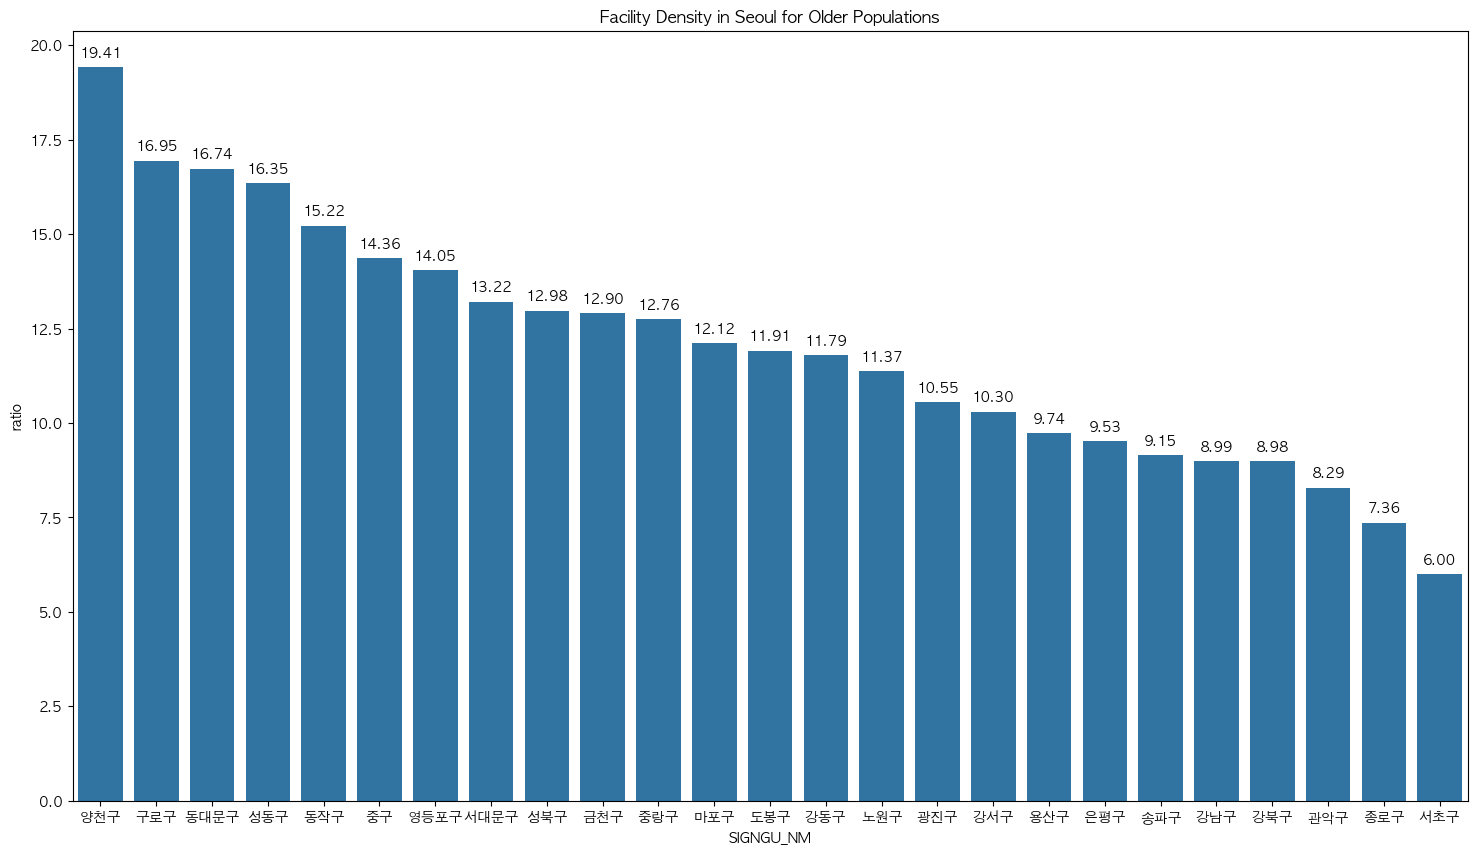

In [159]:
order = merged_facility.sort_values(by='ratio', ascending=False)['SIGNGU_NM'].values

plt.figure(figsize=(18, 10))
ax = sns.barplot(data=merged_facility, x='SIGNGU_NM', y='ratio', order=order)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # 소수점 두 자리까지만 표시
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title("Facility Density in Seoul for Older Populations")
plt.show()

In [29]:
old_point.head()

,구별,합계,남자,여자
0,종로구,267.8,237.3,298
1,중구,286.5,245.3,329.3
2,용산구,200.7,172.2,230
3,성동구,193.4,167.5,219.9
4,광진구,211.1,183.7,240.1


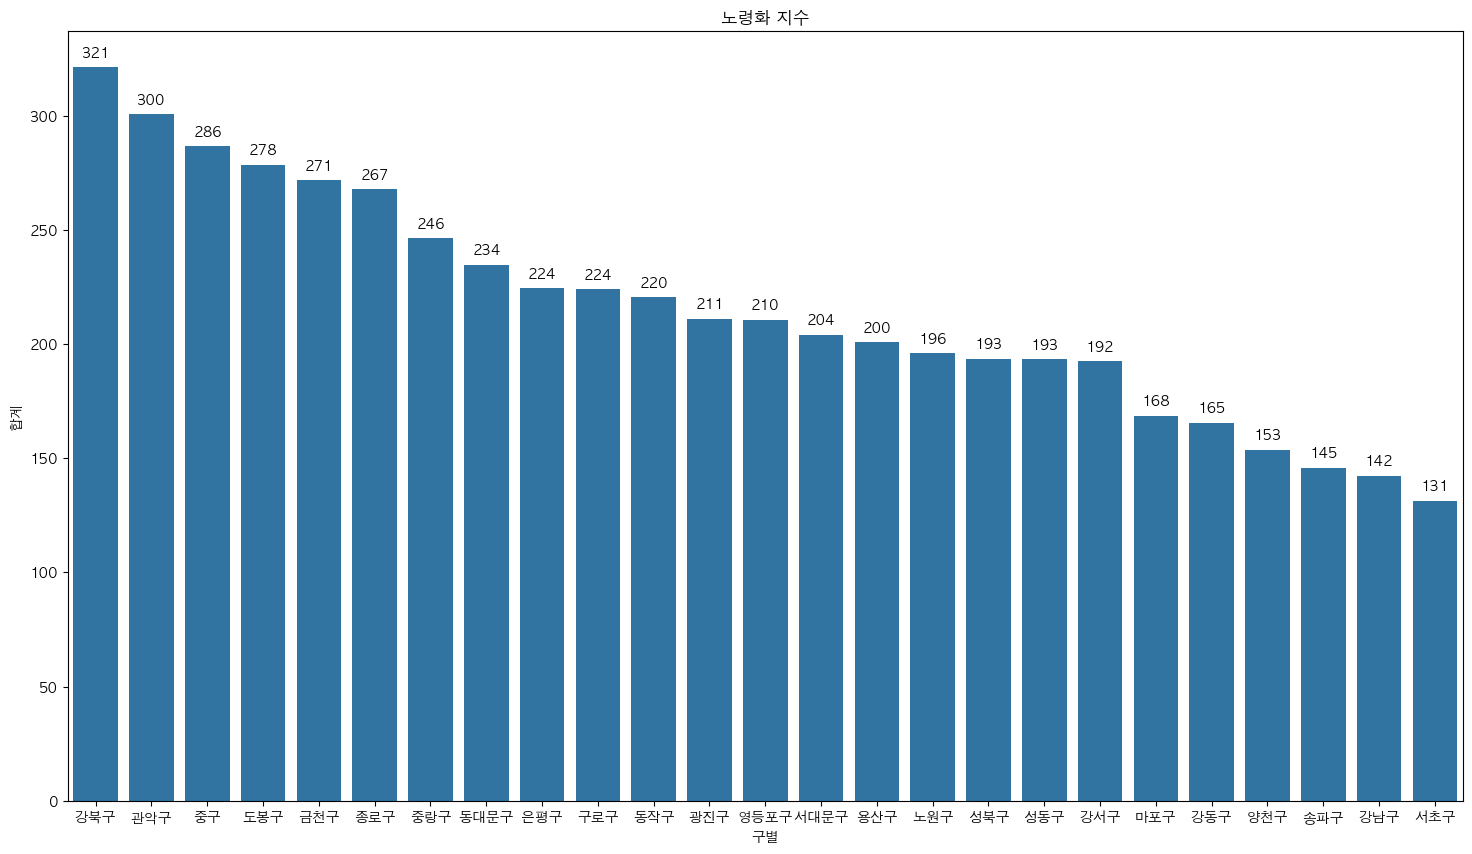

In [34]:
sorted_order = old_point.sort_values(by='합계', ascending=False)['구별']

plt.figure(figsize=(18, 10))
ax = sns.barplot(data=old_point, x='구별', y='합계', order=sorted_order)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')
plt.title("노령화 지수")
plt.show()

In [178]:
old_pop.head()

,구별,유소년인구,생산가능인구,고령인구
0,종로구,7,74.1,18.9
1,중구,6.8,73.6,19.6
2,용산구,8.6,74.1,17.3
3,성동구,8.9,73.8,17.3
4,광진구,7.7,76.1,16.2


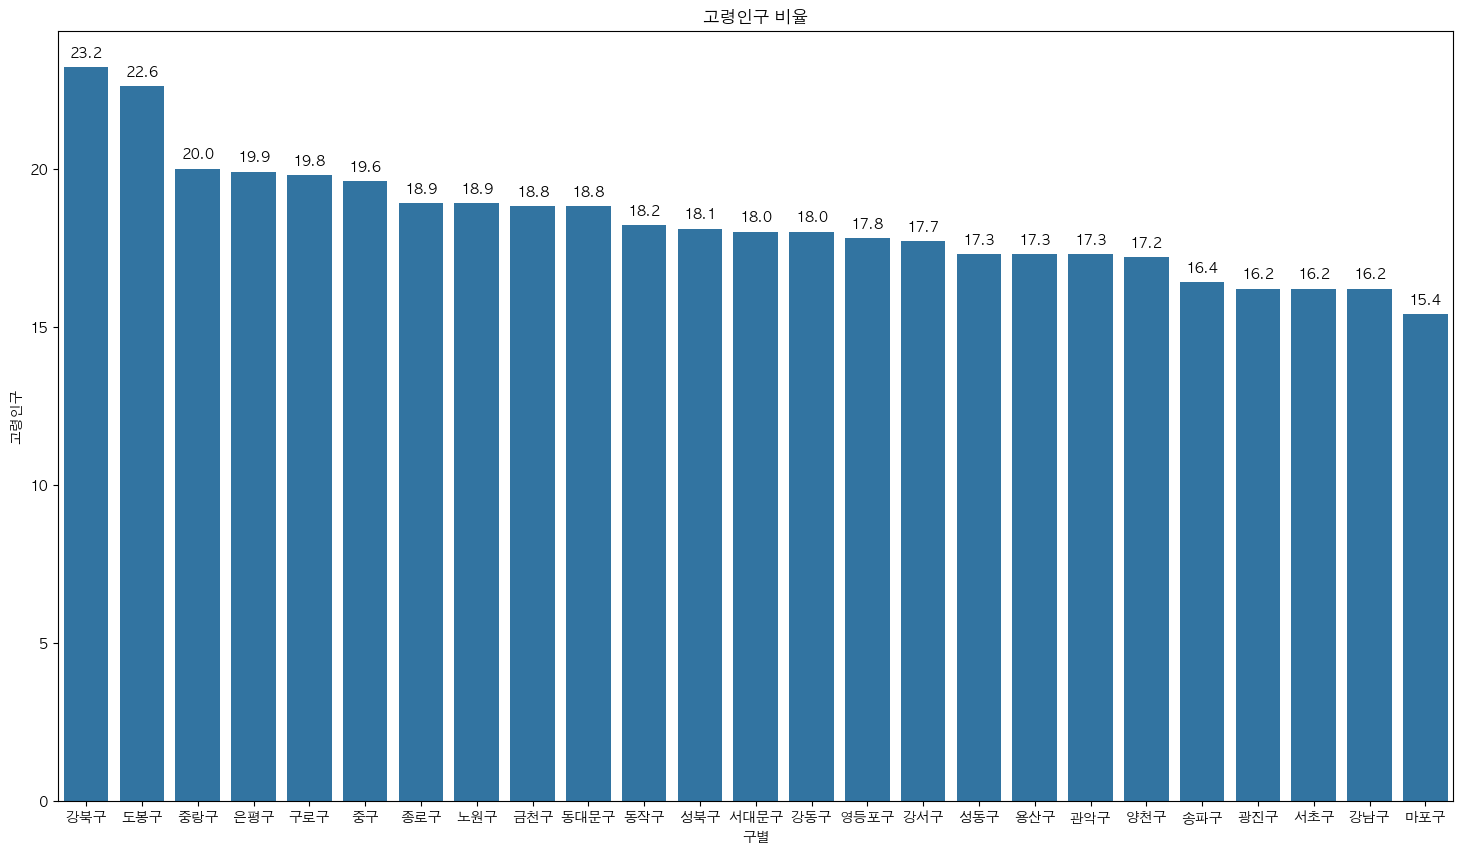

In [180]:
sorted_order = old_pop.sort_values(by='고령인구', ascending=False)['구별']

plt.figure(figsize=(18, 10))
ax = sns.barplot(data=old_pop, x='구별', y='고령인구', order=sorted_order)
for p in ax.patches:
    ax.annotate(f'{float(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')
plt.title("고령인구 비율")
plt.show()